In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost

#Ignore warnings
warnings.filterwarnings('ignore')

#Seaborn visualization set up
%matplotlib inline
sns.set_style('darkgrid')

In [7]:
data = pd.read_csv(r'C:\Users\Hp\Downloads\diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:

data.shape

(768, 9)

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

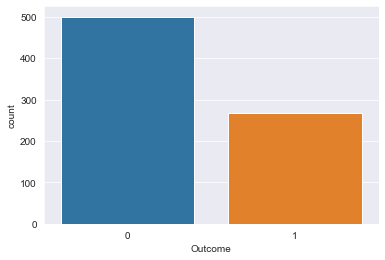

In [13]:
#Plotting the distribution of Outcome
sns.countplot(x= 'Outcome', data = data)

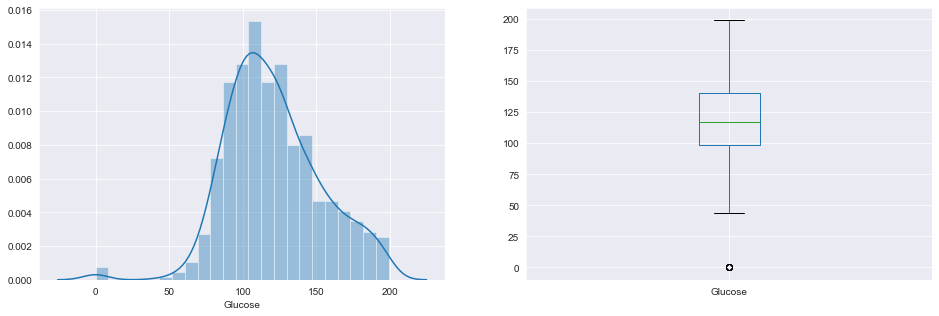

In [14]:
plt.figure(1)
plt.subplot(121), sns.distplot(data['Glucose'])
plt.subplot(122), data['Glucose'].plot.box(figsize=(16,5))
plt.show()

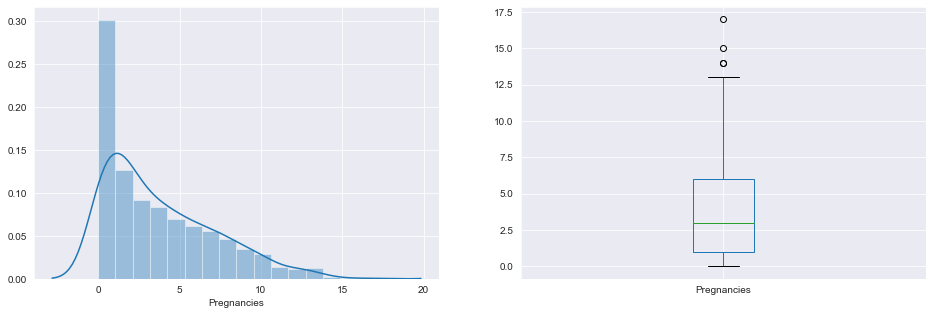

In [15]:
plt.figure(2)
plt.subplot(121), sns.distplot(data['Pregnancies'])
plt.subplot(122), data['Pregnancies'].plot.box(figsize=(16,5))
plt.show()

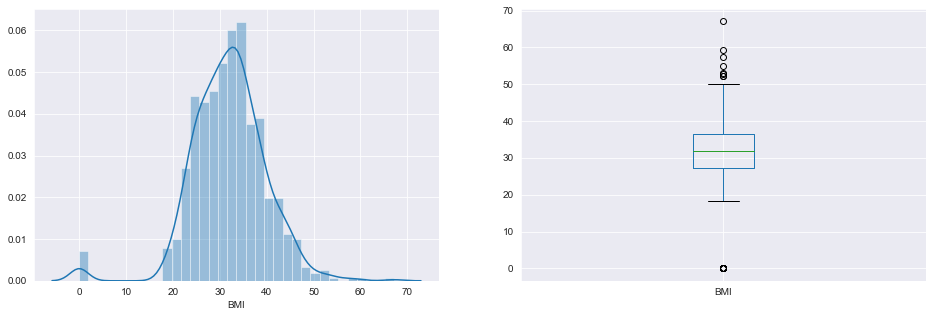

In [16]:
plt.subplot(121), sns.distplot(data['BMI'])
plt.subplot(122), data['BMI'].plot.box(figsize=(16,5))
plt.show()

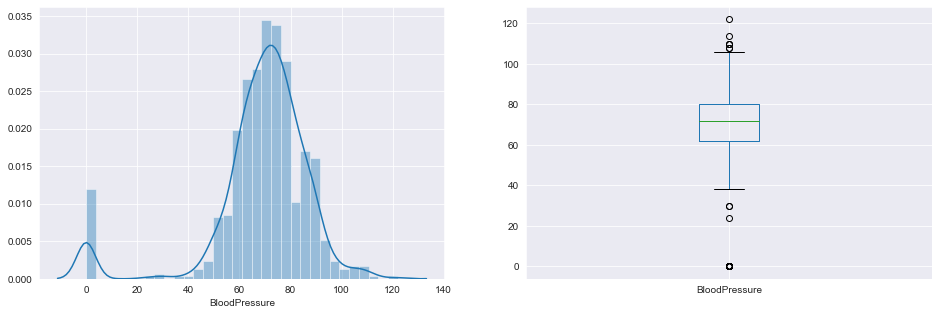

In [17]:
plt.subplot(121), sns.distplot(data['BloodPressure'])
plt.subplot(122), data['BloodPressure'].plot.box(figsize=(16,5))
plt.show()

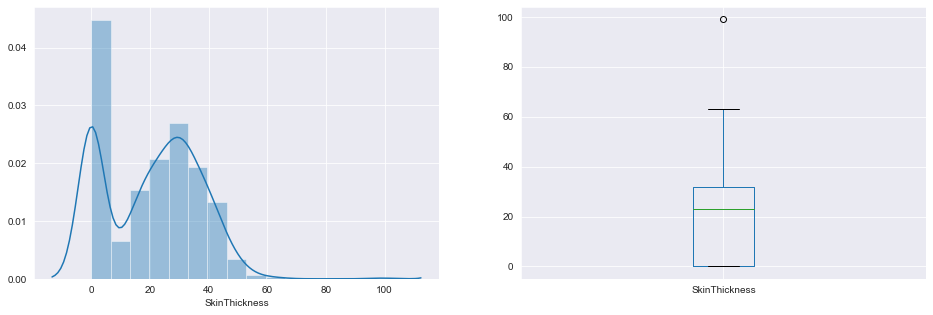

In [18]:
plt.subplot(121), sns.distplot(data['SkinThickness'])
plt.subplot(122), data['SkinThickness'].plot.box(figsize=(16,5))
plt.show()

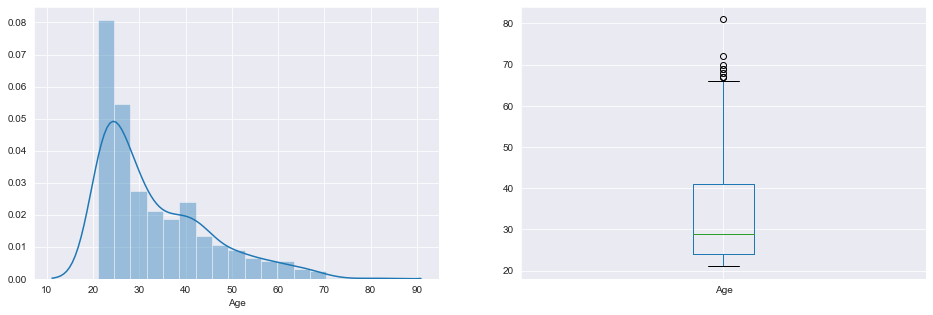

In [19]:
plt.subplot(121), sns.distplot(data['Age'])
plt.subplot(122), data['Age'].plot.box(figsize=(16,5))
plt.show()

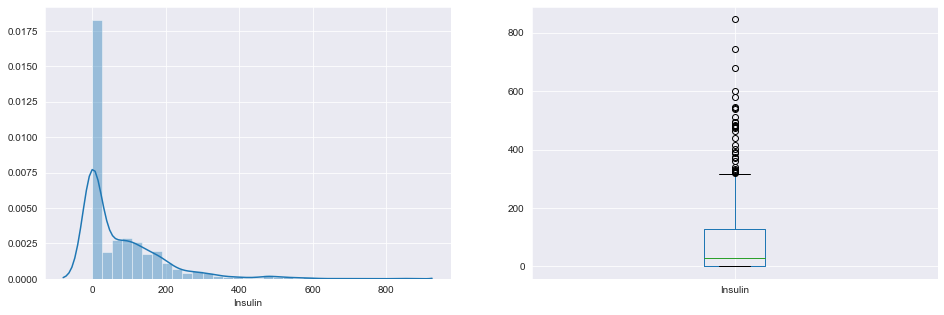

In [20]:
plt.subplot(121), sns.distplot(data['Insulin'])
plt.subplot(122), data['Insulin'].plot.box(figsize=(16,5))
plt.show()

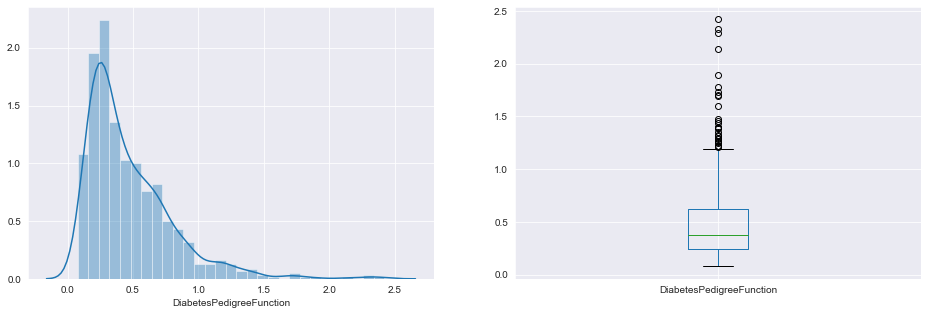

In [21]:
plt.subplot(121), sns.distplot(data['DiabetesPedigreeFunction'])
plt.subplot(122), data['DiabetesPedigreeFunction'].plot.box(figsize=(16,5))
plt.show()

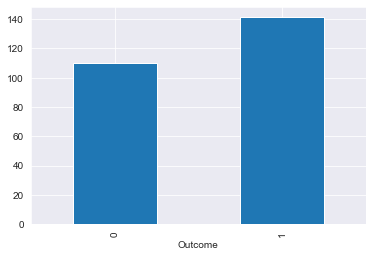

In [22]:
data.groupby('Outcome')['Glucose'].mean().plot.bar()

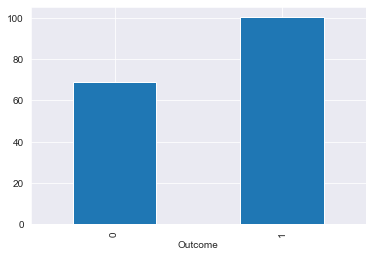

In [23]:
data.groupby('Outcome')['Insulin'].mean().plot.bar()


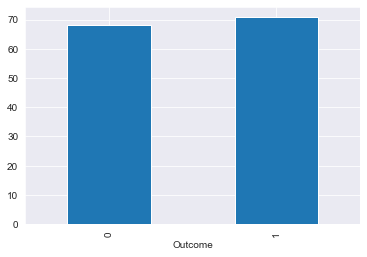

In [24]:
data.groupby('Outcome')['BloodPressure'].mean().plot.bar()


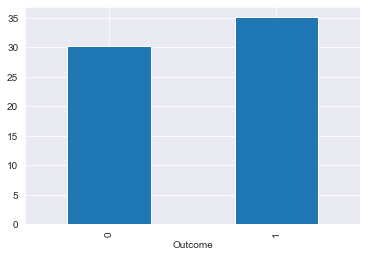

In [25]:
data.groupby('Outcome')['BMI'].mean().plot.bar()


In [26]:
#Check missing values

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

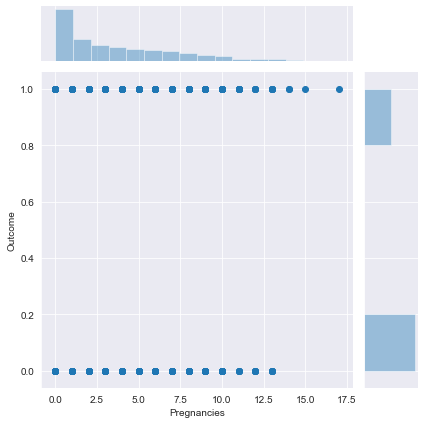

In [27]:
sns.jointplot(x='Pregnancies', y='Outcome', data=data)


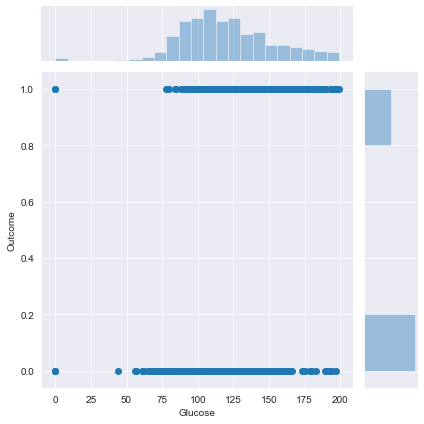

In [28]:
sns.jointplot(x='Glucose', y='Outcome', data=data)


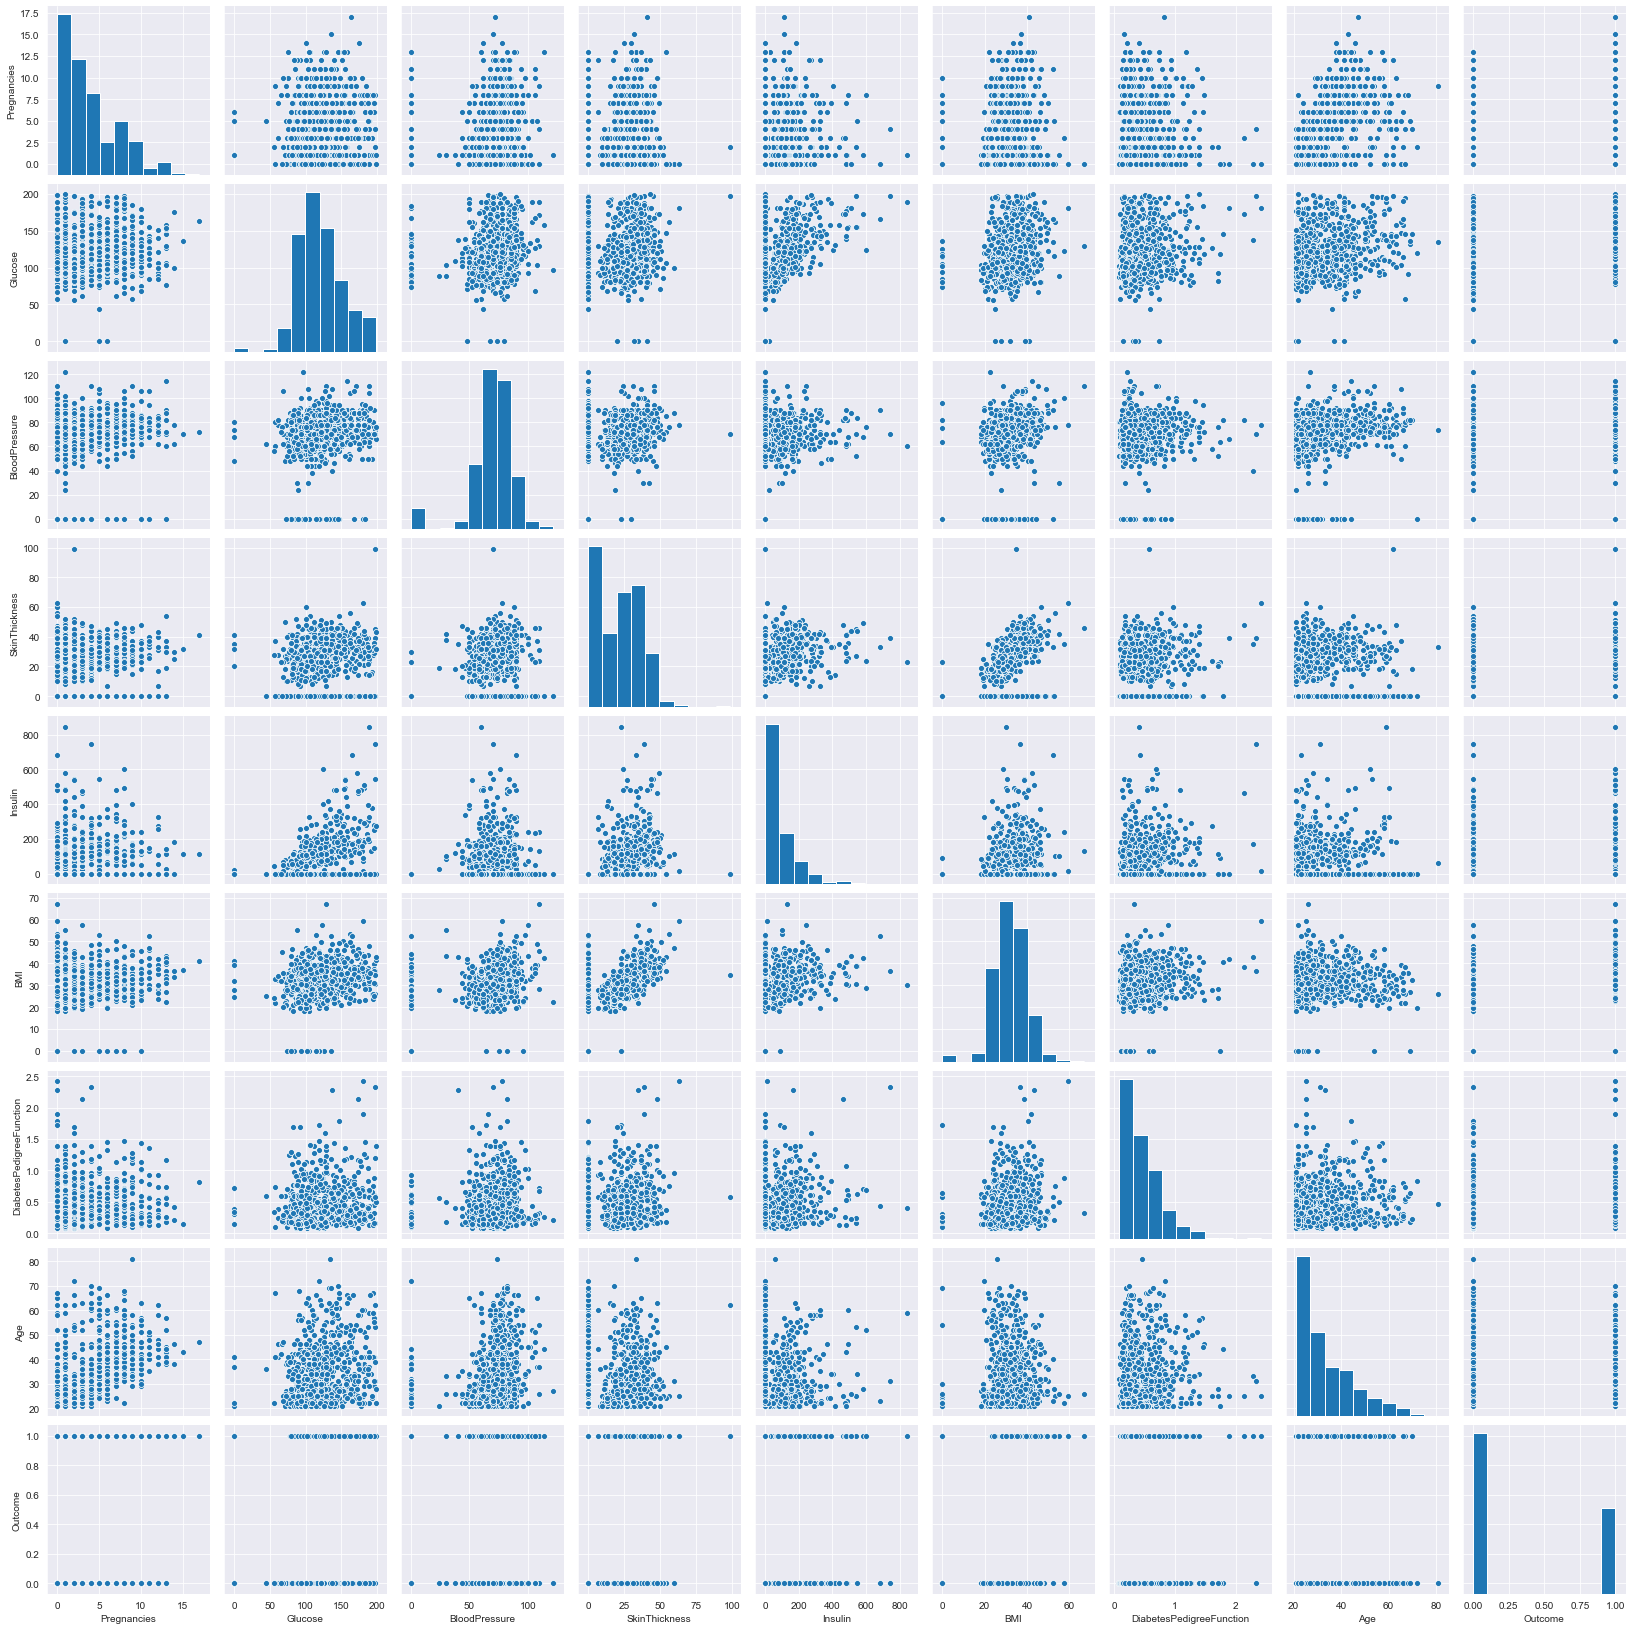

In [29]:
sns.pairplot(data)


In [30]:
#check correlations

data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


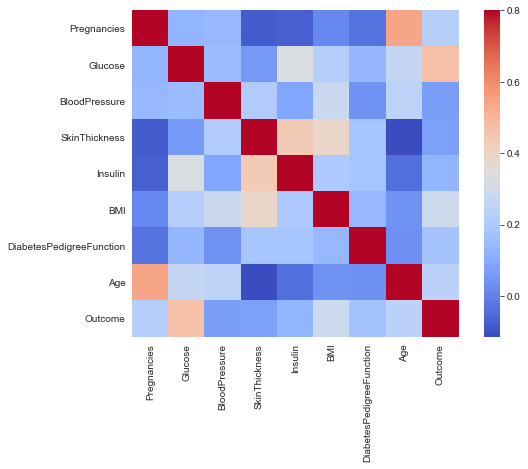

In [31]:
matrix = data.corr() 
ax = plt.subplots(figsize=(9, 6)), sns.heatmap(matrix, vmax=.8, square=True, cmap="coolwarm")

In [32]:
#Splitting the dataset

X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [34]:
#Check columns with zero values

print("Total number of rows: {0}", format(len(data)))
print("Number of rows missing Pregnancies: {0}",
      format(len(data.loc[data['Pregnancies']==0])))
print("Number of rows missing Glucose: {0}"
      , format(len(data.loc[data['Glucose']==0])))
print("Number of rows missing BloodPressure: {0}",
      format(len(data.loc[data['BloodPressure']==0])))
print("Number of rows missing SkinThickness: {0}",
      format(len(data.loc[data['SkinThickness']==0])))
print("Number of rows missing Insulin: {0}",
      format(len(data.loc[data['Insulin']==0])))
print("Number of rows missing BMI: {0}",
      format(len(data.loc[data['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}",
      format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("Number of rows missing Age: {0}", format(len(data.loc[data['Age']==0])))

Total number of rows: {0} 768
Number of rows missing Pregnancies: {0} 111
Number of rows missing Glucose: {0} 5
Number of rows missing BloodPressure: {0} 35
Number of rows missing SkinThickness: {0} 227
Number of rows missing Insulin: {0} 374
Number of rows missing BMI: {0} 11
Number of rows missing DiabetesPedigreeFunction: {0} 0
Number of rows missing Age: {0} 0


In [35]:
#Imputing zeros values in the dataset

from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy='mean', axis=0)
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\Hp\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [36]:
#Builidng the model using RandomForest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
predictions = rfc.predict(X_test)


In [38]:
#Getting the accuracy score for Random Forest

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7677165354330708


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[134  28]
 [ 31  61]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       162
           1       0.69      0.66      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.77      0.77      0.77       254



In [40]:
#Building the model using DecisionTree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
predictions = dtree.predict(X_test)

In [42]:
#Getting the accuracy score for Decision Tree

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7125984251968503


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[129  33]
 [ 40  52]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       162
           1       0.61      0.57      0.59        92

    accuracy                           0.71       254
   macro avg       0.69      0.68      0.68       254
weighted avg       0.71      0.71      0.71       254



In [50]:
#Building model using XGBoost
import sys
!{sys.executable} -m pip install xgboost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

[18:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [51]:
xgb_pred = xgb_model.predict(X_test)

In [52]:
#Getting accuracy score for XGBoost

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7401574803149606


In [53]:
#Metrics for XGBoost
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[131  31]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       162
           1       0.65      0.62      0.63        92

    accuracy                           0.74       254
   macro avg       0.72      0.71      0.72       254
weighted avg       0.74      0.74      0.74       254



In [54]:
#Building the model using Support Vector Machine (SVM)

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
#Predict
svc_pred = svc_model.predict(X_test)

In [56]:
#Accuracy score for SVM
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7480314960629921


In [57]:
#Metrics for SVM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[145  17]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



In [58]:
#Getting feature importances
xgb_model.feature_importances_

array([0.08907107, 0.23959671, 0.08799455, 0.09824965, 0.09801765,
       0.15170811, 0.09959184, 0.13577047], dtype=float32)

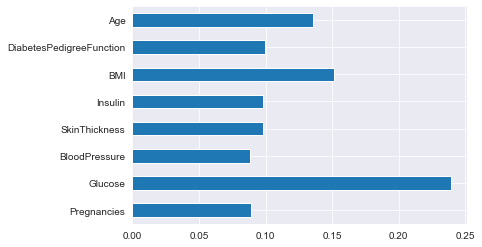

In [59]:
#Plotting feature importances
(pd.Series(xgb_model.feature_importances_, index=X.columns)
   .plot(kind='barh'))

In [60]:
#Printing prediction probabilities for the test data
print('Prediction Probabilities')
xgb_model.predict_proba(X_test)

Prediction Probabilities


array([[9.96812582e-01, 3.18739028e-03],
       [4.35048342e-03, 9.95649517e-01],
       [3.72095585e-01, 6.27904415e-01],
       [9.96410370e-01, 3.58964200e-03],
       [1.23953938e-01, 8.76046062e-01],
       [4.90321696e-01, 5.09678304e-01],
       [9.98940110e-01, 1.05988933e-03],
       [9.94918227e-01, 5.08175837e-03],
       [1.87678337e-01, 8.12321663e-01],
       [5.96706271e-01, 4.03293759e-01],
       [1.74218416e-03, 9.98257816e-01],
       [9.98757422e-01, 1.24257721e-03],
       [1.09923482e-01, 8.90076518e-01],
       [4.95243073e-03, 9.95047569e-01],
       [7.67665446e-01, 2.32334569e-01],
       [9.69065130e-01, 3.09348907e-02],
       [9.87822473e-01, 1.21775391e-02],
       [4.72769737e-02, 9.52723026e-01],
       [9.96866941e-01, 3.13303480e-03],
       [7.32110739e-01, 2.67889231e-01],
       [8.34618568e-01, 1.65381446e-01],
       [9.90157425e-01, 9.84254852e-03],
       [2.50788569e-01, 7.49211431e-01],
       [3.22896242e-02, 9.67710376e-01],
       [9.936121